In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import quantile_transform as qt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [2]:
file=pd.read_csv("../../data/severe_cases_score_data.csv").drop('Unnamed: 0',axis=1).dropna()

In [3]:
data=file[file.columns[4:]]

In [4]:
data

,covid_cases,% Adults 65 and Older,% Diagnosed Diabetes,% Adults with Obesity,Heart Disease Death Rate,Hypertension Death Rate,COPD Mortality Rate,% Smokers
0,2328,15.973,11.4,32.7,388.7,179.6,73.41,18.081557
1,7348,20.978,8.2,30.1,362.6,143.4,45.27,17.489033
2,1107,19.691,15.1,41.2,444.3,217.2,60.07,21.999985
3,948,16.670,12.2,37.4,491.8,143.3,75.08,19.114200
4,2378,18.701,12.2,32.5,437.9,112.4,78.32,19.208672
5,665,16.939,27.9,46.4,456.3,322.5,41.85,22.894664
6,1061,20.820,17.0,47.3,456.4,306.8,65.89,21.765335
7,5254,18.086,15.2,39.7,630.3,72.1,78.86,20.612560
8,1507,20.193,15.6,42.0,366.8,343.8,74.48,19.392927
9,857,23.530,12.0,38.1,442.1,124.8,84.73,17.498674


In [5]:
data.columns

Index(['covid_cases', '% Adults 65 and Older', '% Diagnosed Diabetes',
       '%  Adults with Obesity', 'Heart Disease Death Rate',
       'Hypertension Death Rate', 'COPD Mortality Rate', '% Smokers'],
      dtype='object')

In [6]:
X_norm1=qt(data, n_quantiles=5, random_state=13, copy=False)



Cluster 2 Inertia 971.1283365155805
Cluster 3 Inertia 823.9799580662402
Cluster 4 Inertia 759.8260147916029
Cluster 5 Inertia 710.7439702188884
Cluster 6 Inertia 665.9124198602865
Cluster 7 Inertia 629.3863272364653


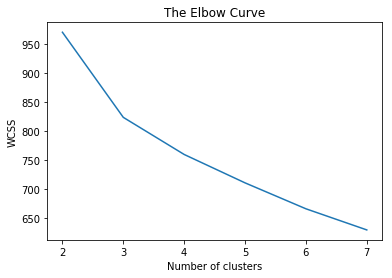

In [7]:
wcss = []  #Within-Cluster-Sum-of-Squares
end=8
for i in range(2,end):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_norm1)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(2,end),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #
plt.show()

No. Clusters: 2, Silhouette Score: 0.251, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.232, Change from Previous Cluster: -0.019
No. Clusters: 4, Silhouette Score: 0.18, Change from Previous Cluster: -0.052
No. Clusters: 5, Silhouette Score: 0.167, Change from Previous Cluster: -0.013
No. Clusters: 6, Silhouette Score: 0.17, Change from Previous Cluster: 0.003
No. Clusters: 7, Silhouette Score: 0.17, Change from Previous Cluster: 0.0
No. Clusters: 8, Silhouette Score: 0.156, Change from Previous Cluster: -0.014
No. Clusters: 9, Silhouette Score: 0.153, Change from Previous Cluster: -0.003
No. Clusters: 10, Silhouette Score: 0.156, Change from Previous Cluster: 0.003
No. Clusters: 11, Silhouette Score: 0.149, Change from Previous Cluster: -0.007
No. Clusters: 12, Silhouette Score: 0.149, Change from Previous Cluster: 0.0
No. Clusters: 13, Silhouette Score: 0.148, Change from Previous Cluster: -0.001
No. Clusters: 14, Silhouette Score: 0.158, Change from Previou

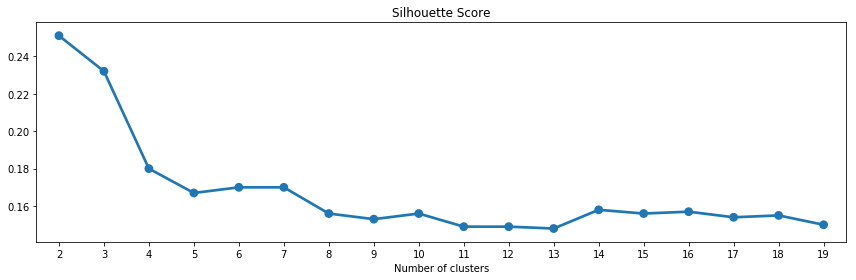

In [8]:
import seaborn as sns
from sklearn.metrics import silhouette_score
n_clu = []
km_ss = []

start=2
end=20
# Create a for loop to find optimal n_clusters
for n_clusters in range(start,end):

    # Create cluster labels
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(X_norm1)

    silhouette_avg = round(silhouette_score(X_norm1, labels, random_state=1), 3)

    # Append score to lists
    km_ss.append(silhouette_avg)
    n_clu.append(n_clusters)

    print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
        n_clusters, silhouette_avg, (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

    # Plot graph at the end of loop
    if n_clusters == end - 1:
        plt.figure(figsize=(12,4))

        plt.title('Silhouette Score')
        plt.xlabel("Number of clusters")
        sns.pointplot(x=n_clu, y=km_ss)
        plt.tight_layout()
        plt.show()

## BIC score with a Gaussian Mixture Model

In [9]:


gm_bic= []
gm_score=[]
for i in range(2,15):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_norm1)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_norm1)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_norm1)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_norm1))
    gm_score.append(gm.score(X_norm1))

BIC for number of cluster(s) 2: -10484.850208148939
Log-likelihood score for number of cluster(s) 2: 1.782548206082674
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -13854.675761769626
Log-likelihood score for number of cluster(s) 3: 2.376468196608993
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -15297.754779933026
Log-likelihood score for number of cluster(s) 4: 2.663776707909136
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -16506.69638334444
Log-likelihood score for number of cluster(s) 5: 2.9138259234180657
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -16270.395447347808
Log-likelihood score for number of cluster(s) 6: 2.9338874655647986


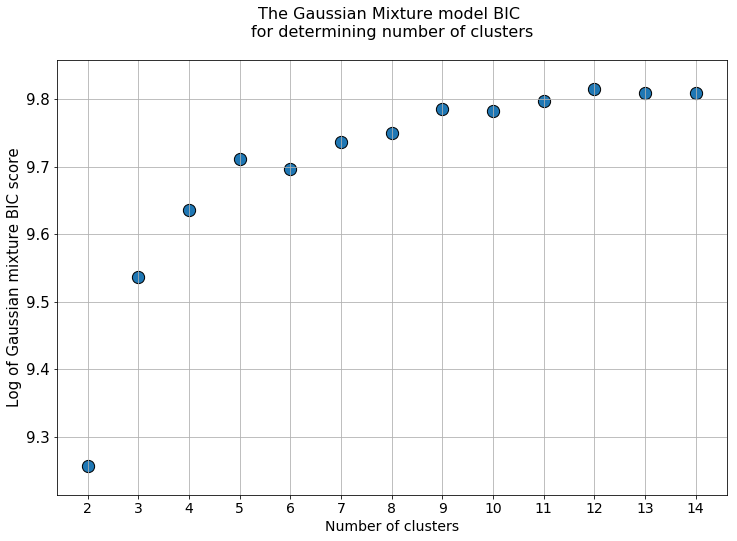

In [10]:
plt.figure(figsize=(12,8))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


In [11]:
new_data=pd.DataFrame(data=X_norm1,columns=data.columns.tolist())

In [12]:
from sklearn.metrics import davies_bouldin_score
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data)
    labels = kmeans.labels_
    score=davies_bouldin_score(data, labels)
    print("Cluster", i, "Davis Score", score)

Cluster 2 Davis Score 0.2767537534870527
Cluster 3 Davis Score 0.4170644653881698
Cluster 4 Davis Score 0.42741741624463003
Cluster 5 Davis Score 0.3484280158039995
Cluster 6 Davis Score 0.38357493745548443
Cluster 7 Davis Score 0.42861858505147293
Cluster 8 Davis Score 0.44485072623960675
Cluster 9 Davis Score 0.40592778665736184


In [13]:
model=  KMeans(
               n_clusters=3,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           )
model.fit(new_data)
label=pd.DataFrame(model.labels_)

In [14]:
new_data['class']=label

In [15]:
new_data['class'].value_counts()

1    1411
2     926
0     805
Name: class, dtype: int64

In [16]:
new_data['class']

0       1
1       0
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
3112    2
3113    0
3114    0
3115    0
3116    2
3117    0
3118    0
3119    0
3120    2
3121    0
3122    2
3123    2
3124    2
3125    0
3126    2
3127    2
3128    2
3129    0
3130    0
3131    0
3132    2
3133    2
3134    2
3135    2
3136    2
3137    1
3138    0
3139    1
3140    2
3141    2
Name: class, Length: 3142, dtype: int32

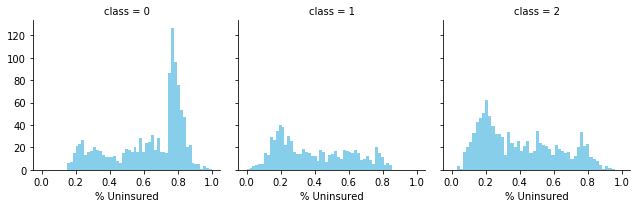

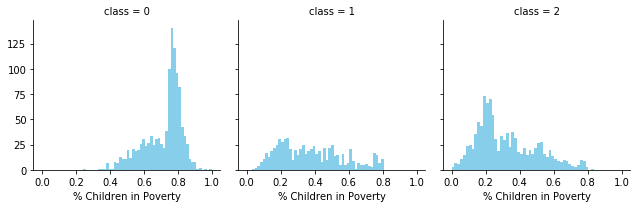

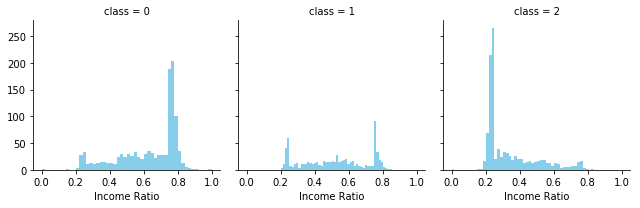

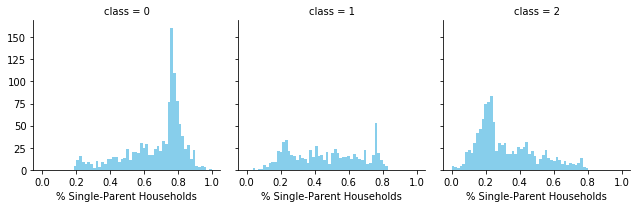

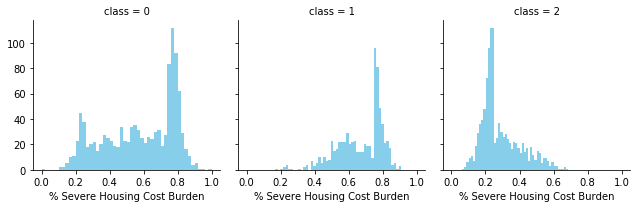

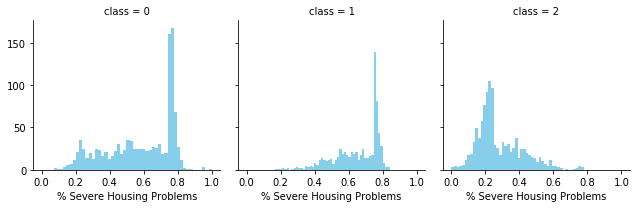

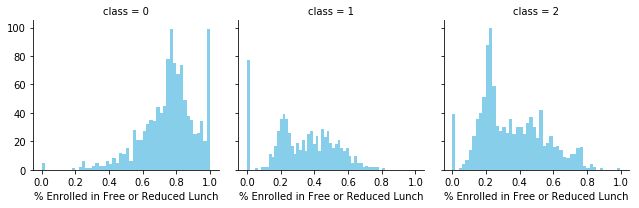

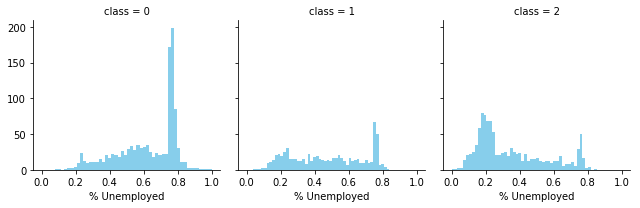

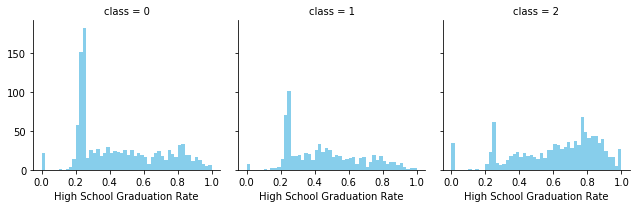

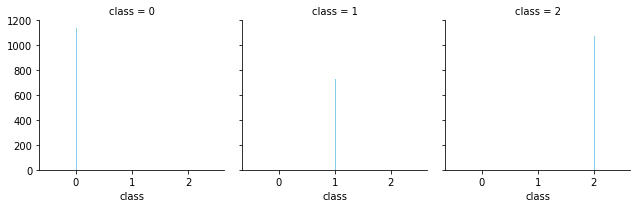

In [13]:
for features in new_data:
    grid= sns.FacetGrid(new_data, col='class')
    color='red' if features=="Deaths" else 'skyblue'
    grid.map(plt.hist, features,bins=50,color=color)

In [17]:
from sklearn.metrics import classification_report as clf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data[new_data.columns[:-1]],new_data['class'], test_size=0.33, random_state=42)

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
test_model=ExtraTreesClassifier()

test_model.fit(X_train,y_train)

y_pred = test_model.predict(X_test)
print(clf(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       274
           1       0.94      0.97      0.96       466
           2       0.97      0.95      0.96       297

    accuracy                           0.95      1037
   macro avg       0.96      0.95      0.95      1037
weighted avg       0.95      0.95      0.95      1037



In [19]:
columns=new_data.columns[:-1]

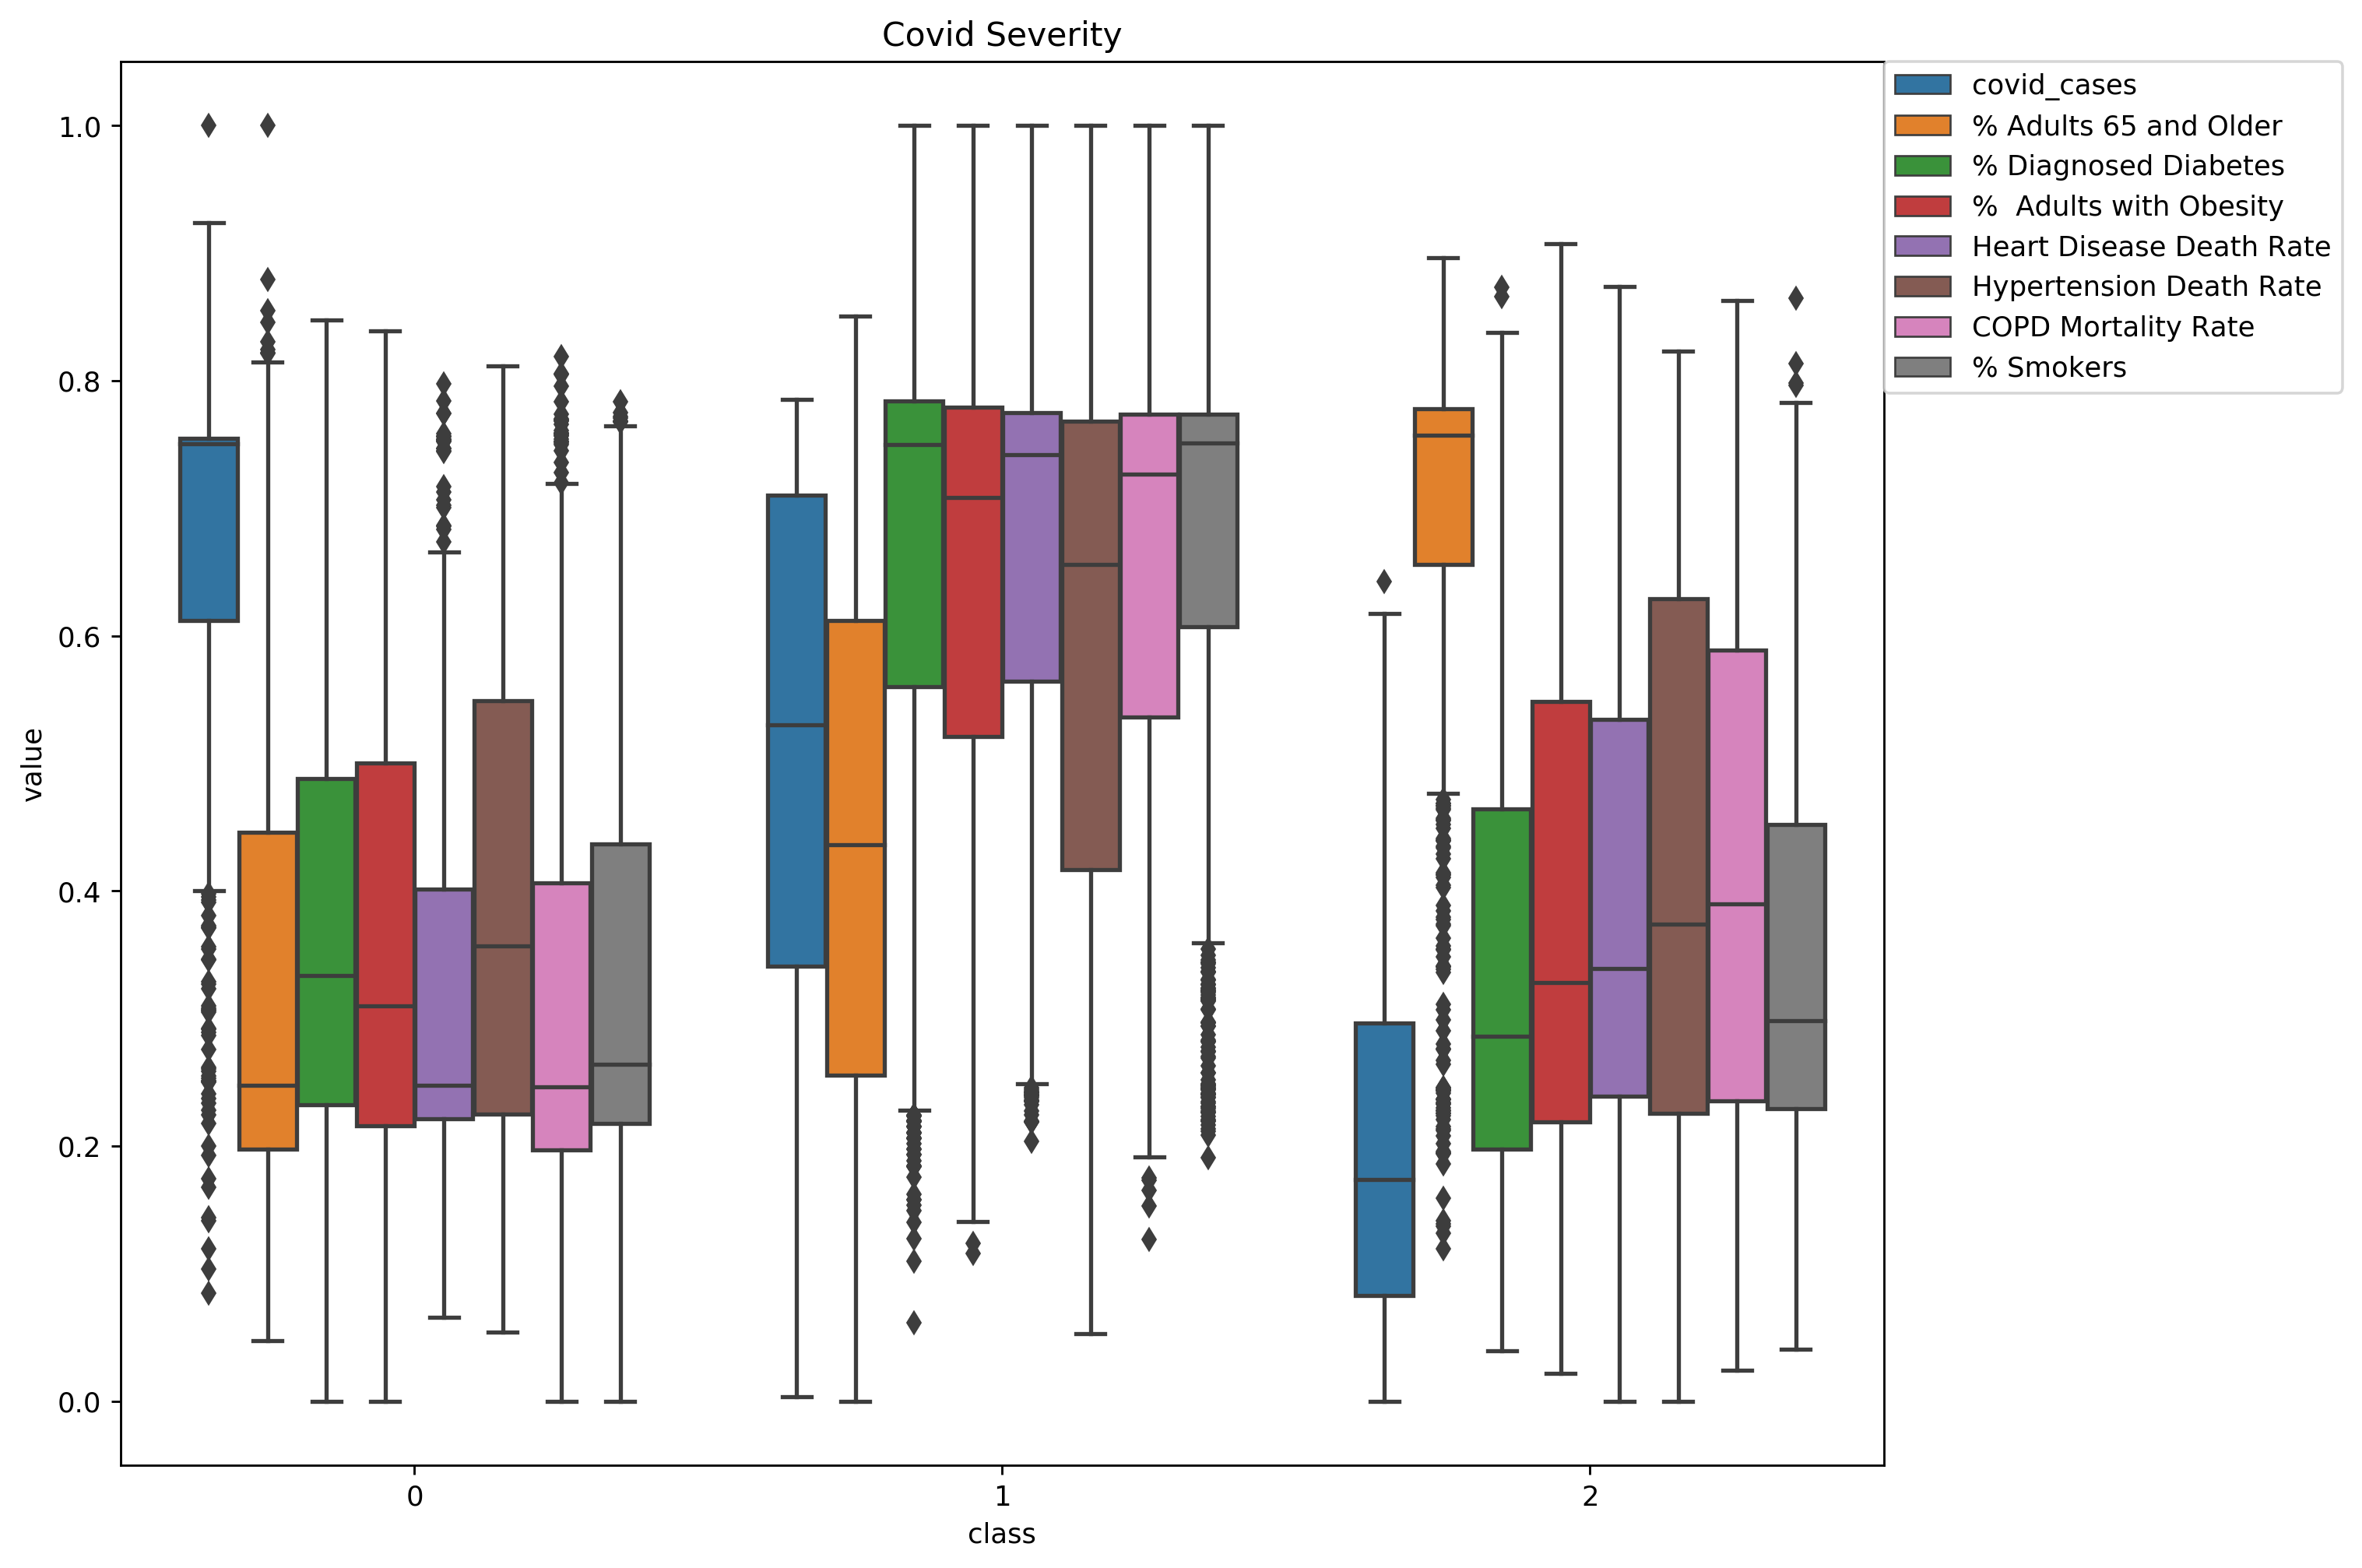

In [20]:
import seaborn as sns
import seaborn as sns


plt.figure(frameon=False,figsize=(12,8),dpi=255)
dd=pd.melt(new_data,id_vars=['class'],value_vars=columns,var_name='boxplot',)
sns.boxplot(x='class',y='value',data=dd,hue='boxplot',)
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0,)
plt.title("Covid Severity")
plt.tight_layout()

In [53]:
# from yellowbrick.cluster import SilhouetteVisualizer


# for i in range(2,6):
#     plt.figure(figsize=(6,10))
#     plt.title(str(i)+" Clusters")
#     km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
#     visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
#     visualizer.fit(X_train)


In [54]:
# from yellowbrick.features import manifold_embedding
# visualizer = manifold_embedding(X_test, y_test)

### Merging Score column and class

In [21]:
file['class']=new_data['class']

In [22]:
class_0=file[file['class']==0]
class_1=file[file['class']==1]
class_2=file[file['class']==2]

In [23]:
class_0.columns

Index(['FIPS', 'State', 'County', 'Severe COVID Case Complications',
       'covid_cases', '% Adults 65 and Older', '% Diagnosed Diabetes',
       '%  Adults with Obesity', 'Heart Disease Death Rate',
       'Hypertension Death Rate', 'COPD Mortality Rate', '% Smokers', 'class'],
      dtype='object')

In [24]:
# State count in dataset

state_count=file['State'].value_counts().to_dict()


In [25]:
cluster1_states=class_0['State'].value_counts()[:5].to_dict()
cluster2_states=class_1['State'].value_counts()[:5].to_dict()
cluster3_states=class_2['State'].value_counts()[:5].to_dict()
    

In [26]:
for val in cluster1_states:
    cluster1_states[val]=cluster1_states.get(val)/state_count.get(val)*100
for val in cluster2_states:
    cluster2_states[val]=cluster2_states.get(val)/state_count.get(val)*100
for val in cluster3_states:
    cluster3_states[val]=cluster3_states.get(val)/state_count.get(val)*100

#### Cluster 1

In [27]:
cluster1_states

{'Texas': 26.48221343873518,
 'Wisconsin': 65.27777777777779,
 'Minnesota': 48.275862068965516,
 'Virginia': 30.82706766917293,
 'California': 63.793103448275865}

<BarContainer object of 5 artists>

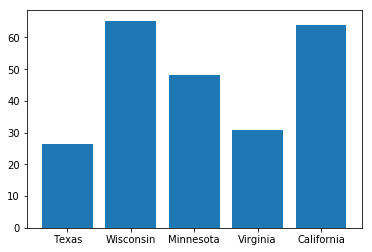

In [28]:
keys = cluster1_states.keys()
values = cluster1_states.values()

plt.bar(keys, values)

#### Cluster 2

In [29]:
cluster2_states

{'Georgia': 75.47169811320755,
 'Kentucky': 91.66666666666666,
 'Tennessee': 90.81632653061224,
 'Texas': 33.99209486166008,
 'Mississippi': 98.78048780487805}

<BarContainer object of 5 artists>

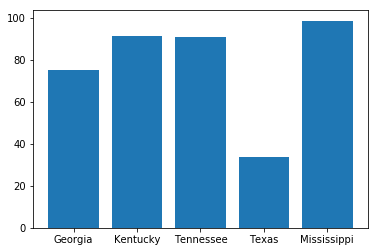

In [30]:
keys = cluster2_states.keys()
values = cluster2_states.values()

plt.bar(keys, values)

#### Cluster 3

In [31]:
cluster3_states

{'Texas': 39.52569169960474,
 'Nebraska': 77.41935483870968,
 'Kansas': 58.0952380952381,
 'Iowa': 46.464646464646464,
 'Virginia': 33.08270676691729}

<BarContainer object of 5 artists>

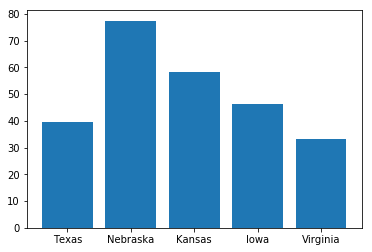

In [32]:
keys = cluster3_states.keys()
values = cluster3_states.values()

plt.bar(keys, values)

In [33]:
class_1['State'].value_counts()[:5]

Georgia        120
Kentucky       110
Tennessee       89
Texas           86
Mississippi     81
Name: State, dtype: int64

In [34]:
class_2['State'].value_counts()[:5]

Texas       100
Nebraska     72
Kansas       61
Iowa         46
Virginia     44
Name: State, dtype: int64

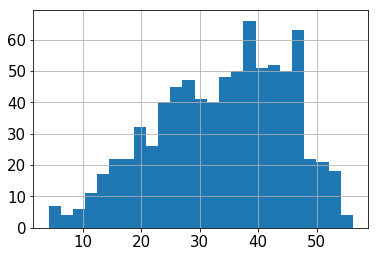

In [37]:
class_0['Severe COVID Case Complications'].hist(xlabelsize=15,ylabelsize=15,bins=25)

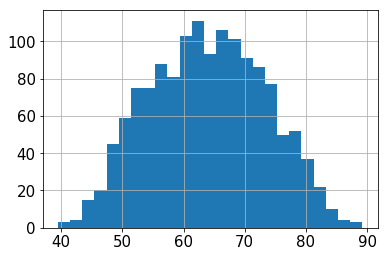

In [41]:
class_1['Severe COVID Case Complications'].hist(xlabelsize=15,ylabelsize=15,bins=25)

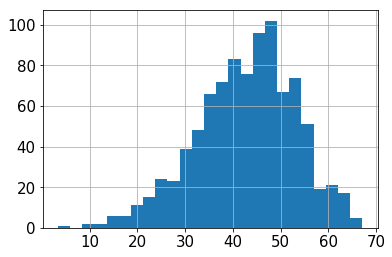

In [42]:
class_2['Severe COVID Case Complications'].hist(xlabelsize=15,ylabelsize=15,bins=25)

## Intercluster Distance Maps
Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership,<br><br> e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

## PCA Plot

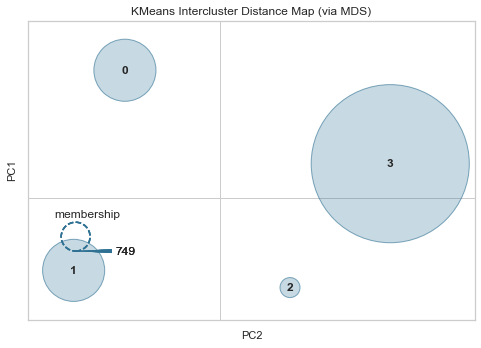

In [43]:
from yellowbrick.cluster import intercluster_distance



visualizer = intercluster_distance(
                KMeans(
               n_clusters=4,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42),
               X_norm1)

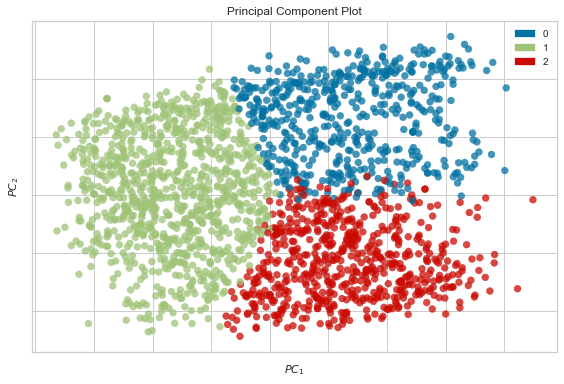

In [44]:
from yellowbrick.features import pca_decomposition
visualizer = pca_decomposition(X_train,y_train)

In [45]:
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [58]:
slc =  {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X_norm1)
    if k == 2: labels = kmeans.labels_
    clusters = kmeans.labels_
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
#     db[k] = davies_bouldin_score(X,clusters)
    slc[k] = silhouette_score(X_norm1,clusters)

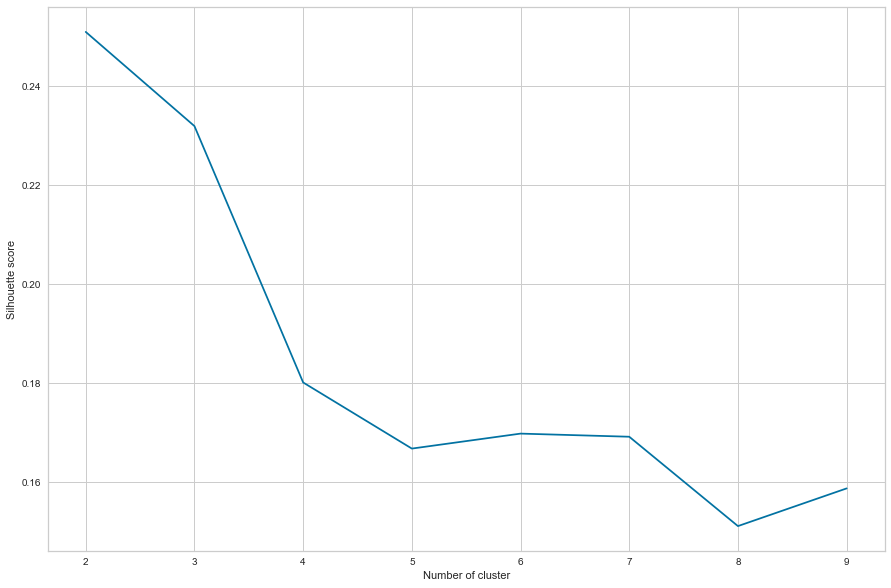

In [59]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2509884980346135
For n_clusters = 3 The average silhouette_score is : 0.23196706063616326
For n_clusters = 4 The average silhouette_score is : 0.18018667806604835
For n_clusters = 5 The average silhouette_score is : 0.16683571690128027
For n_clusters = 6 The average silhouette_score is : 0.16985913612916653
For n_clusters = 7 The average silhouette_score is : 0.1692275601676119
For n_clusters = 8 The average silhouette_score is : 0.1511805327439586
For n_clusters = 9 The average silhouette_score is : 0.1587938196174912


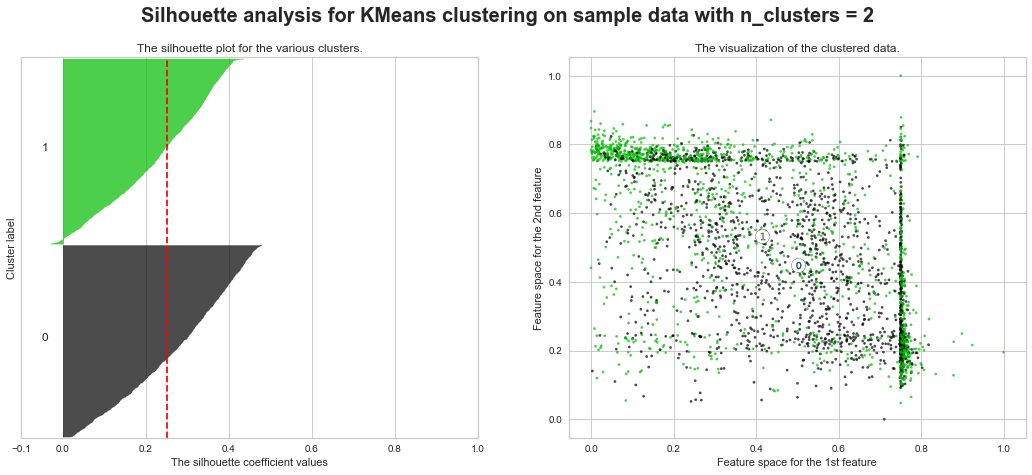

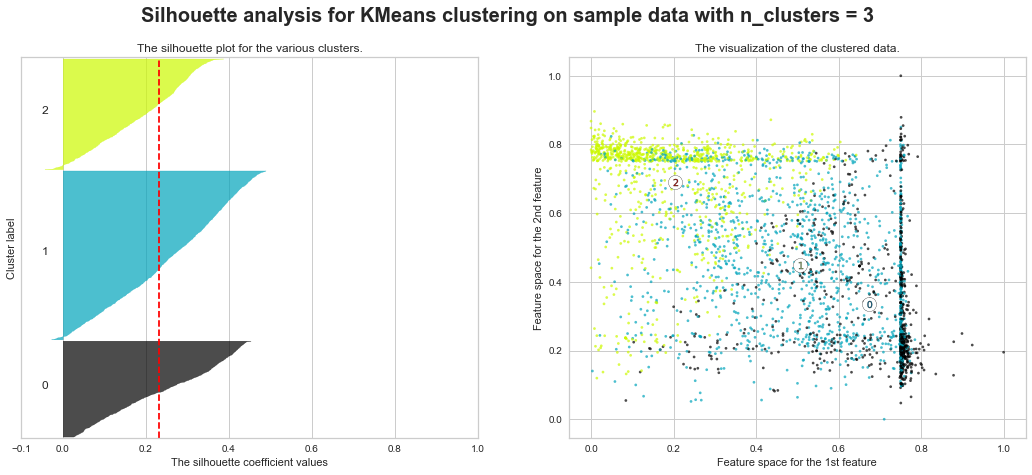

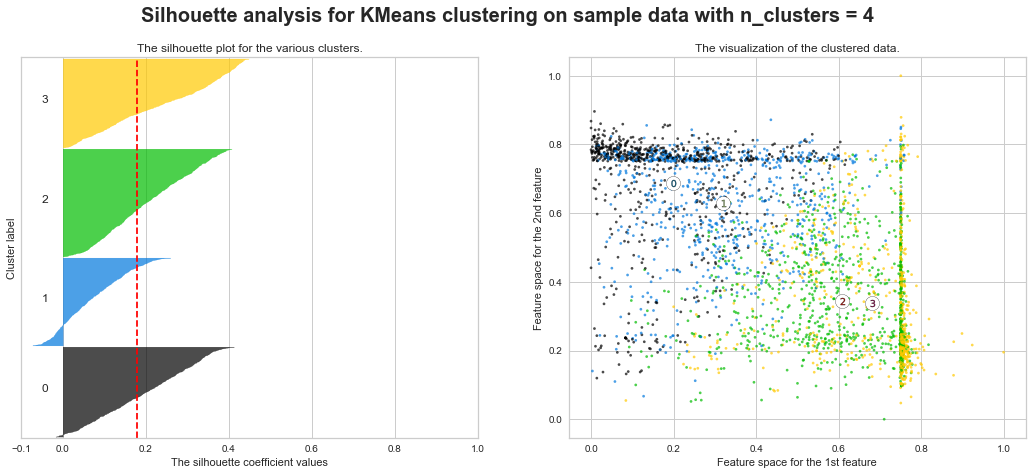

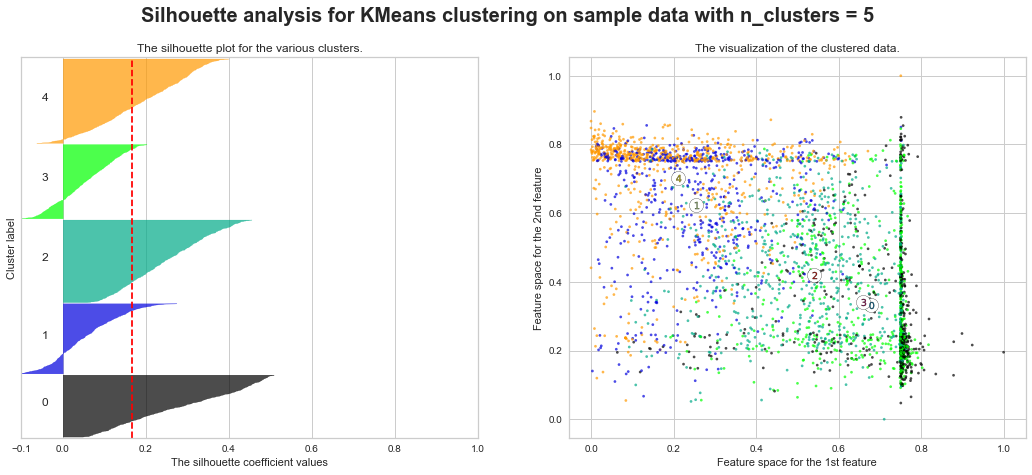

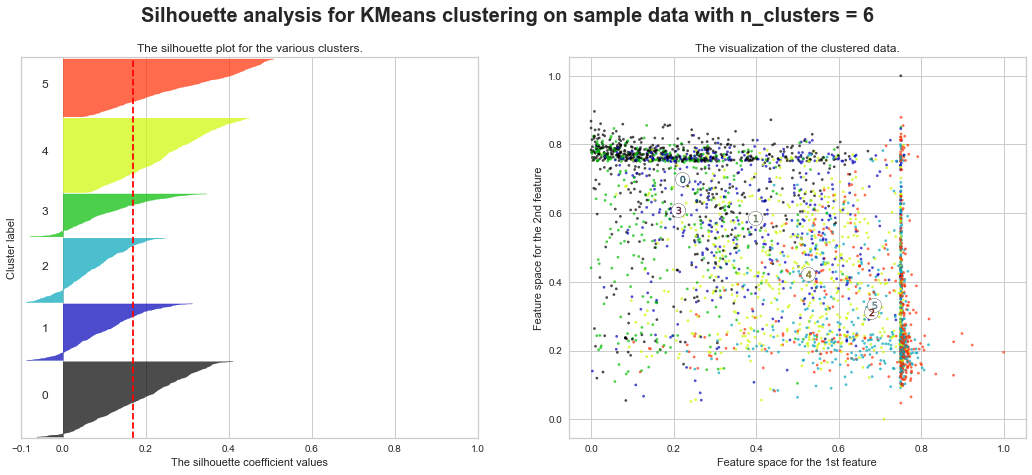

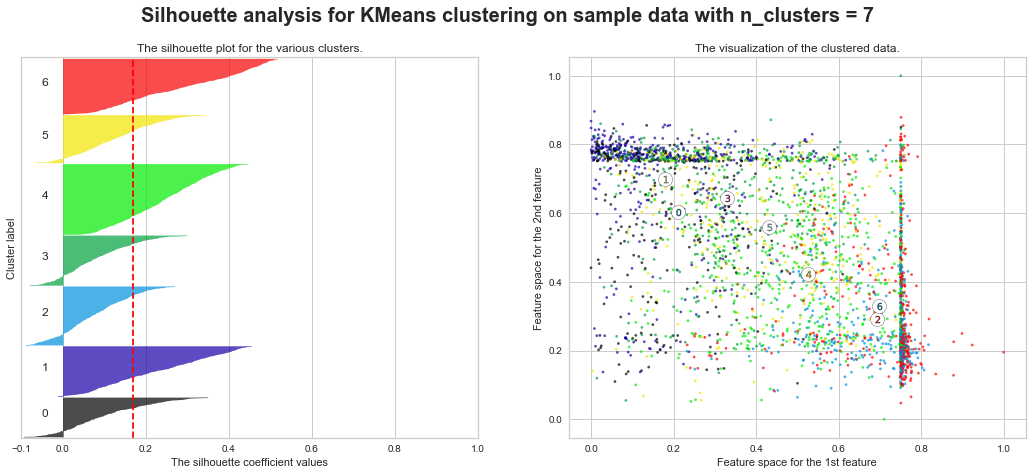

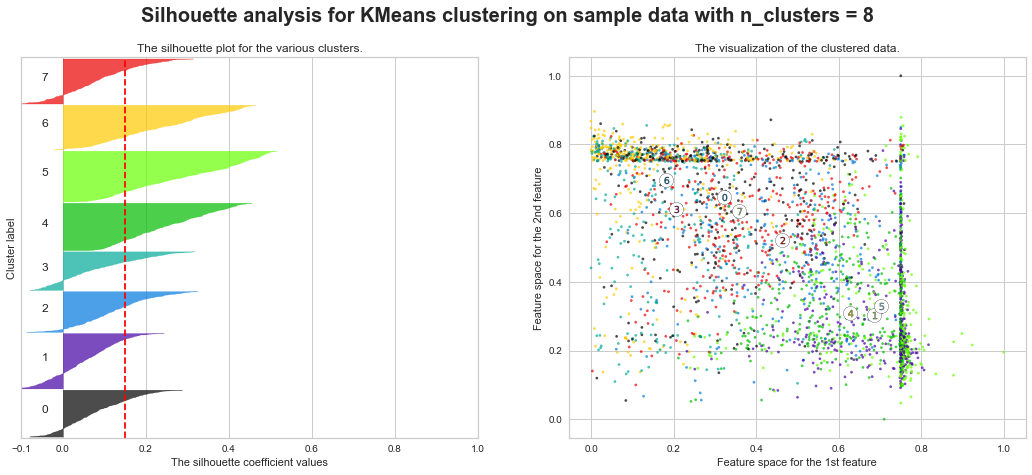

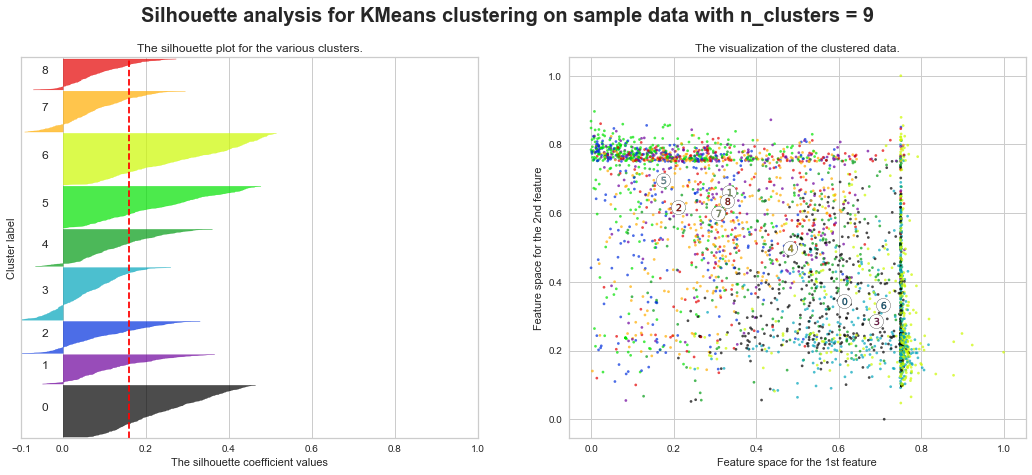

In [60]:
for n_clusters in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_norm1) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X_norm1)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_norm1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_norm1, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_norm1[:, 0], X_norm1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=20, fontweight='bold')

plt.show()